# Future CMIP
To effectively assess future climate-related risks for River Rhine discharge, it is recognized that historical observations alone are not suitable. Therefore, future climate data, specifically from climate models, is essential to understand how much the climate will change and the extent of future climate risk. 

Shared Socioeconomic Pathways (SSPs) are a set of narratives developed for climate research to explore how global society, demographics, and economics might evolve over the 21st century. These potential future scenarios significantly influence greenhouse gas emissions and, consequently, the extent of climate change. SSPs describe five distinct pathways that represent different ways the world could develop in terms of population growth, economic development, technological progress, energy use, and environmental policies.

Four SSPs—1-2.6, 2-4.5, 3-7.0 and 5-8.5—are selected for their relevance to River Rhine discharge modeling from 2026 to 2099. SSP4 is excluded due to its divergent regional-inequality focus, *which doesnt align with the Rhine catchment?*.

| SSP Scenario | Key Features                                                | Radiative Forcing by 2100 (W/m²) | ΔT by 2100 (°C) |
|:-------------|:------------------------------------------------------------|:-------------------------------:|:--------------:|
| **SSP1-2.6** | Sustainability focus; aggressive green-energy deployment; low inequality | 2.6 (≈ RCP2.6)                  | ~1.8           |
| **SSP2-4.5** | Middle-of-the-road continuation of current trends; balanced growth and technology | 4.5 (≈ RCP4.5)                  | ~2.7           |
| **SSP3-7.0** | Regional rivalry; high fossil-fuel reliance; limited global cooperation | 7.0  (≈ RCP7.0)                           | ~3.6           |
| **SSP5-8.5** | Rapid economic expansion via fossil fuels; minimal mitigation effort   | 8.5 (≈ RCP8.5)                  | ~4.4           |








Future Rhine discharges are simulated with the HBV model driven by CMIP6 forcings from the German MPI model (CMIP6 - Coupled Model Intercomparison Project - CMCC, 2025). A single ensemble member—r1i1p1f1—out of the MPI’s 25-member ensemble is employed. The parameters used are the ones calibrated in **Chapter...**

In [1]:
# general python
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import geopandas as gpd
import pandas as pd
import seaborn as sns

#niceties
from rich import print


# general eWaterCycle
import ewatercycle
import ewatercycle.models
import ewatercycle.forcing


## Choose region and time period

In [2]:
# name of the catchment
basin_name = "FR000119"

# defining dates for calibration
future_start_date = "2026-01-01T00:00:00Z"
future_end_date = "2099-12-31T00:00:00Z"

#Define Catchment Area
shapefile_path = Path.home() / "BEP-Elke" / "book" / "thesis_projects" / "BSc" / "2025_Q4_ElkeSchokking_CEG" / "work in progress" / "ShapefilesFR000119" / "FR000119.shp"

## Set up paths

In [3]:
# Location forcing files in home directory
forcing_path_CMIP_Future = Path.home() / "forcing" / "FR000119" / "CMIP" / "Future"
forcing_path_CMIP_Future.mkdir(parents=True, exist_ok=True)

## Catchment

<Axes: >

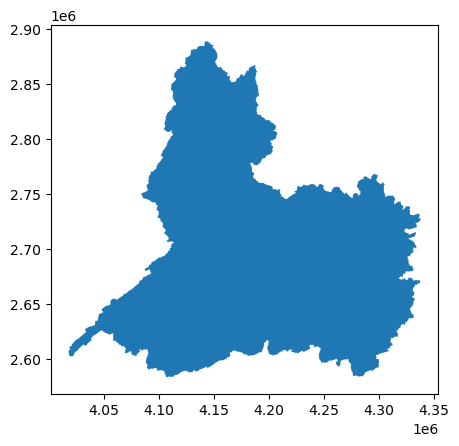

In [4]:
catchment = gpd.read_file(shapefile_path)
catchment = catchment.to_crs(epsg=3035)
catchment["area_km2"] = catchment.geometry.area / 1e6  
basin_area = catchment["area_km2"].sum()
catchment.plot()

## Generate CMIP forcing

### SSP126

In [5]:
# Location forcing files in home directory
forcing_path_CMIP_Future_1 = Path.home() / "forcing" / "FR000119" / "CMIP" / "Future" / "ssp126"
forcing_path_CMIP_Future_1.mkdir(parents=True, exist_ok=True)

In [6]:
#CMIP dataset information
cmip_future_1 =  {
   'project': 'CMIP6',
   'activity': 'ScenarioMIP',
   'exp': 'ssp126',
   'mip': 'day',
   'dataset': 'MPI-ESM1-2-HR',
   'ensemble': 'r1i1p1f1',
   'institute': 'DKRZ',
   'grid': 'gn'
}

In [7]:
# # option one: generate forcing:
# CMIP_forcing_1 = ewatercycle.forcing.sources["LumpedMakkinkForcing"].generate(
#    dataset=cmip_future_1,
#    start_time=future_start_date,
#    end_time=future_end_date,
#    shape=shapefile_path,
#    directory=forcing_path_CMIP_Future_1,
# )

In [8]:
# print(CMIP_forcing_1)

In [9]:
# Option two: load generated data

# Load SSP126 data
ssp126_location =  Path('/home/elke/forcing/FR000119/CMIP/Future/ssp126/work/diagnostic/script/') 
SSP126 = ewatercycle.forcing.sources["LumpedMakkinkForcing"].load(directory=ssp126_location)

In [10]:
print(SSP126)

LumpedMakkinkForcing(
    start_time='2026-01-01T00:00:00Z',
    end_time='2099-12-31T00:00:00Z',
    directory=PosixPath('/home/elke/forcing/FR000119/CMIP/Future/ssp126/work/diagnostic/script'),
    shape=PosixPath('/home/elke/forcing/FR000119/CMIP/Future/ssp126/work/diagnostic/script/FR000119.shp'),
    filenames={
        'pr': 'CMIP6_MPI-ESM1-2-HR_day_ssp126_r1i1p1f1_pr_gn_2026-2099.nc',
        'tas': 'CMIP6_MPI-ESM1-2-HR_day_ssp126_r1i1p1f1_tas_gn_2026-2099.nc',
        'rsds': 'CMIP6_MPI-ESM1-2-HR_day_ssp126_r1i1p1f1_rsds_gn_2026-2099.nc',
        'evspsblpot': 'Derived_Makkink_evspsblpot.nc'
    }
)

### SSP245

In [11]:
# Location forcing files in home directory
forcing_path_CMIP_Future_2 = Path.home() / "forcing" / "FR000119" / "CMIP" / "Future" / "ssp245"
forcing_path_CMIP_Future_2.mkdir(parents=True, exist_ok=True)

In [12]:
#CMIP dataset information
cmip_future_2 =  {
   'project': 'CMIP6',
   'activity': 'ScenarioMIP',
   'exp': 'ssp245',
   'mip': 'day',
   'dataset': 'MPI-ESM1-2-HR',
   'ensemble': 'r1i1p1f1',
   'institute': 'DKRZ',
   'grid': 'gn'
}

In [13]:
# # option one: generate forcing:
# CMIP_forcing_2 = ewatercycle.forcing.sources["LumpedMakkinkForcing"].generate(
#    dataset=cmip_future_2,
#    start_time=future_start_date,
#    end_time=future_end_date,
#    shape=shapefile_path,
#    directory=forcing_path_CMIP_Future_2,
# )

In [14]:
# print(CMIP_forcing_2)

In [15]:
# Option two: load generated data

# Load SSP245 data
ssp245_location =  Path('/home/elke/forcing/FR000119/CMIP/Future/ssp245/work/diagnostic/script/') 
SSP245 = ewatercycle.forcing.sources["LumpedMakkinkForcing"].load(directory=ssp245_location)

In [16]:
print(SSP245)

LumpedMakkinkForcing(
    start_time='2026-01-01T00:00:00Z',
    end_time='2099-12-31T00:00:00Z',
    directory=PosixPath('/home/elke/forcing/FR000119/CMIP/Future/ssp245/work/diagnostic/script'),
    shape=PosixPath('/home/elke/forcing/FR000119/CMIP/Future/ssp245/work/diagnostic/script/FR000119.shp'),
    filenames={
        'pr': 'CMIP6_MPI-ESM1-2-HR_day_ssp245_r1i1p1f1_pr_gn_2026-2099.nc',
        'tas': 'CMIP6_MPI-ESM1-2-HR_day_ssp245_r1i1p1f1_tas_gn_2026-2099.nc',
        'rsds': 'CMIP6_MPI-ESM1-2-HR_day_ssp245_r1i1p1f1_rsds_gn_2026-2099.nc',
        'evspsblpot': 'Derived_Makkink_evspsblpot.nc'
    }
)

### SSP370

In [17]:
# Location forcing files in home directory
forcing_path_CMIP_Future_3 = Path.home() / "forcing" / "FR000119" / "CMIP" / "Future" / "ssp370"
forcing_path_CMIP_Future_3.mkdir(parents=True, exist_ok=True)

In [18]:
#CMIP dataset information
cmip_future_3 =  {
   'project': 'CMIP6',
   'activity': 'ScenarioMIP',
   'exp': 'ssp370',
   'mip': 'day',
   'dataset': 'MPI-ESM1-2-HR',
   'ensemble': 'r1i1p1f1',
   'institute': 'DKRZ',
   'grid': 'gn'
}

In [19]:
# # option one: generate forcing:
# CMIP_forcing_3 = ewatercycle.forcing.sources["LumpedMakkinkForcing"].generate(
#    dataset=cmip_future_3,
#    start_time=future_start_date,
#    end_time=future_end_date,
#    shape=shapefile_path,
#    directory=forcing_path_CMIP_Future_3,
# )

In [20]:
# print(CMIP_forcing_3)

In [21]:
# Option two: load generated data

# Load SSP370 data
ssp370_location =  Path('/home/elke/forcing/FR000119/CMIP/Future/ssp370/work/diagnostic/script/') 
SSP370 = ewatercycle.forcing.sources["LumpedMakkinkForcing"].load(directory=ssp370_location)

In [22]:
print(SSP370)

LumpedMakkinkForcing(
    start_time='2026-01-01T00:00:00Z',
    end_time='2099-12-31T00:00:00Z',
    directory=PosixPath('/home/elke/forcing/FR000119/CMIP/Future/ssp370/work/diagnostic/script'),
    shape=PosixPath('/home/elke/forcing/FR000119/CMIP/Future/ssp370/work/diagnostic/script/FR000119.shp'),
    filenames={
        'pr': 'CMIP6_MPI-ESM1-2-HR_day_ssp370_r1i1p1f1_pr_gn_2026-2099.nc',
        'tas': 'CMIP6_MPI-ESM1-2-HR_day_ssp370_r1i1p1f1_tas_gn_2026-2099.nc',
        'rsds': 'CMIP6_MPI-ESM1-2-HR_day_ssp370_r1i1p1f1_rsds_gn_2026-2099.nc',
        'evspsblpot': 'Derived_Makkink_evspsblpot.nc'
    }
)

### SSP585

In [23]:
# Location forcing files in home directory
forcing_path_CMIP_Future_5 = Path.home() / "forcing" / "FR000119" / "CMIP" / "Future" / "ssp585"
forcing_path_CMIP_Future_5.mkdir(parents=True, exist_ok=True)

In [24]:
#CMIP dataset information
cmip_future_5 =  {
   'project': 'CMIP6',
   'activity': 'ScenarioMIP',
   'exp': 'ssp585',
   'mip': 'day',
   'dataset': 'MPI-ESM1-2-HR',
   'ensemble': 'r1i1p1f1',
   'institute': 'DKRZ',
   'grid': 'gn'
}

In [25]:
# # option one: generate forcing:
# CMIP_forcing_5 = ewatercycle.forcing.sources["LumpedMakkinkForcing"].generate(
#    dataset=cmip_future_5,
#    start_time=future_start_date,
#    end_time=future_end_date,
#    shape=shapefile_path,
#    directory=forcing_path_CMIP_Future_5,
# )

In [26]:
# print(CMIP_forcing_5)

In [27]:
# Option two: load generated data

# Load SSP370 data
ssp585_location =  Path('/home/elke/forcing/FR000119/CMIP/Future/ssp585/work/diagnostic/script/') 
SSP585 = ewatercycle.forcing.sources["LumpedMakkinkForcing"].load(directory=ssp585_location)

In [28]:
print(SSP585)

LumpedMakkinkForcing(
    start_time='2026-01-01T00:00:00Z',
    end_time='2099-12-31T00:00:00Z',
    directory=PosixPath('/home/elke/forcing/FR000119/CMIP/Future/ssp585/work/diagnostic/script'),
    shape=PosixPath('/home/elke/forcing/FR000119/CMIP/Future/ssp585/work/diagnostic/script/FR000119.shp'),
    filenames={
        'pr': 'CMIP6_MPI-ESM1-2-HR_day_ssp585_r1i1p1f1_pr_gn_2026-2099.nc',
        'tas': 'CMIP6_MPI-ESM1-2-HR_day_ssp585_r1i1p1f1_tas_gn_2026-2099.nc',
        'rsds': 'CMIP6_MPI-ESM1-2-HR_day_ssp585_r1i1p1f1_rsds_gn_2026-2099.nc',
        'evspsblpot': 'Derived_Makkink_evspsblpot.nc'
    }
)

## Setting up the model

### Parameters

In [29]:
#Calibrated parameters, logNSE & EMD
par_0 = [4.533, 0.4272, 442.0109, 1.0321, 0.0714, 8.5025, 0.0139, 0.0099, 1.085]
param_names = ['Imax', 'Ce', 'Sumax', 'Beta', 'Pmax', 'Tlag', 'Kf', 'Ks', 'FM']

print(list(zip(param_names, np.round(par_0, decimals=3))))

[
    ('Imax', 4.533),
    ('Ce', 0.427),
    ('Sumax', 442.011),
    ('Beta', 1.032),
    ('Pmax', 0.071),
    ('Tlag', 8.502),
    ('Kf', 0.014),
    ('Ks', 0.01),
    ('FM', 1.085)
]

In [30]:
# Starting values for HBV storages (in mm)
# [Si, Su, Sf, Ss, Sp]

s_0 = np.array([0, 100, 0, 5, 0])

### HBV model

In [31]:
model = ewatercycle.models.HBV(forcing=SSP126)

In [32]:
config_file, _ = model.setup(parameters=par_0, initial_storage=s_0)

In [33]:
model.initialize(config_file)

## Running the model

In [34]:
Q_m = []
time = []
while model.time < model.end_time:
    model.update()
    Q_m.append(model.get_value("Q")[0])
    time.append(pd.Timestamp(model.time_as_datetime))

In [35]:
model.finalize()

In [37]:
forcing_list = [SSP126, SSP245, SSP370, SSP585]
output = []
days = []

for forcings in forcing_list:
    model = ewatercycle.models.HBV(forcing=forcings)
    config_file, _ = model.setup(
        parameters=par_0, 
        initial_storage=s_0,
        )

    model.initialize(config_file)

    Q_m = []
    time = []
    
    while model.time < model.end_time:
        model.update()
        Q_m.append(model.get_value("Q")[0])
        time.append(pd.Timestamp(model.time_as_datetime))
        
    output.append(Q_m)
    days.append(time)
    
    del Q_m, time
    model.finalize()

## Process results

### Model output

In [38]:
#Convert
scenario_names = ["SSP1-2.6", "SSP2-4.5", "SSP3-7.0", "SSP5-8.5"]
converted_outputs = {}

for name, q_vals, time_vals in zip(scenario_names, output, days):
    model_output = pd.Series(data=q_vals, name="Modelled discharge", index=pd.DatetimeIndex(time_vals))
    model_output.index = model_output.index.tz_localize("UTC")

    # Convert using your exact formula
    df = pd.DataFrame(model_output)
    model_data = df['Modelled discharge'] * basin_area * 1000 / (24 * 60 * 60)  # m³/s

    converted_outputs[name] = model_data

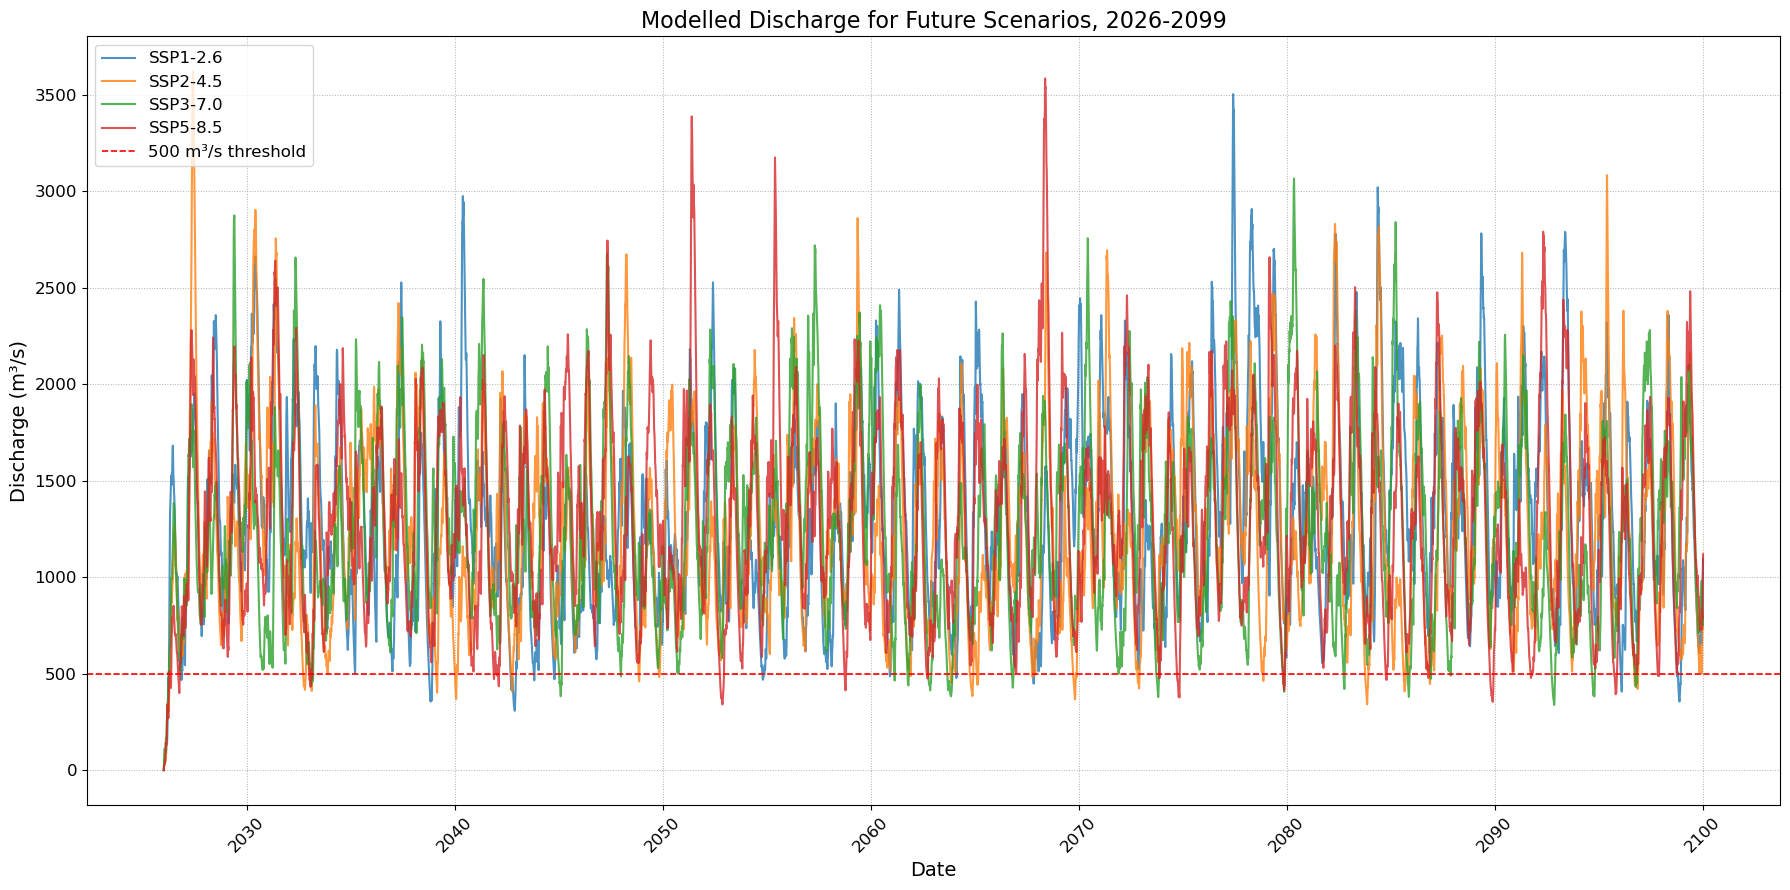

In [39]:
#Plot
plt.figure(figsize=(18, 9))  # Wider and taller

for name, data in converted_outputs.items():
    plt.plot(data.index, data.values, label=name, linewidth=1.5, alpha=0.8)

# Threshold line
plt.axhline(y=500, color='red', linestyle='--', linewidth=1.2, label='500 m³/s threshold')

# Labels and title
plt.xlabel("Date", fontsize=14)
plt.ylabel("Discharge (m³/s)", fontsize=14)
plt.title("Modelled Discharge for Future Scenarios, 2026-2099", fontsize=16)

# Ticks and legend
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper left", fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.7)

# Tight layout for spacing
plt.tight_layout()
plt.show()

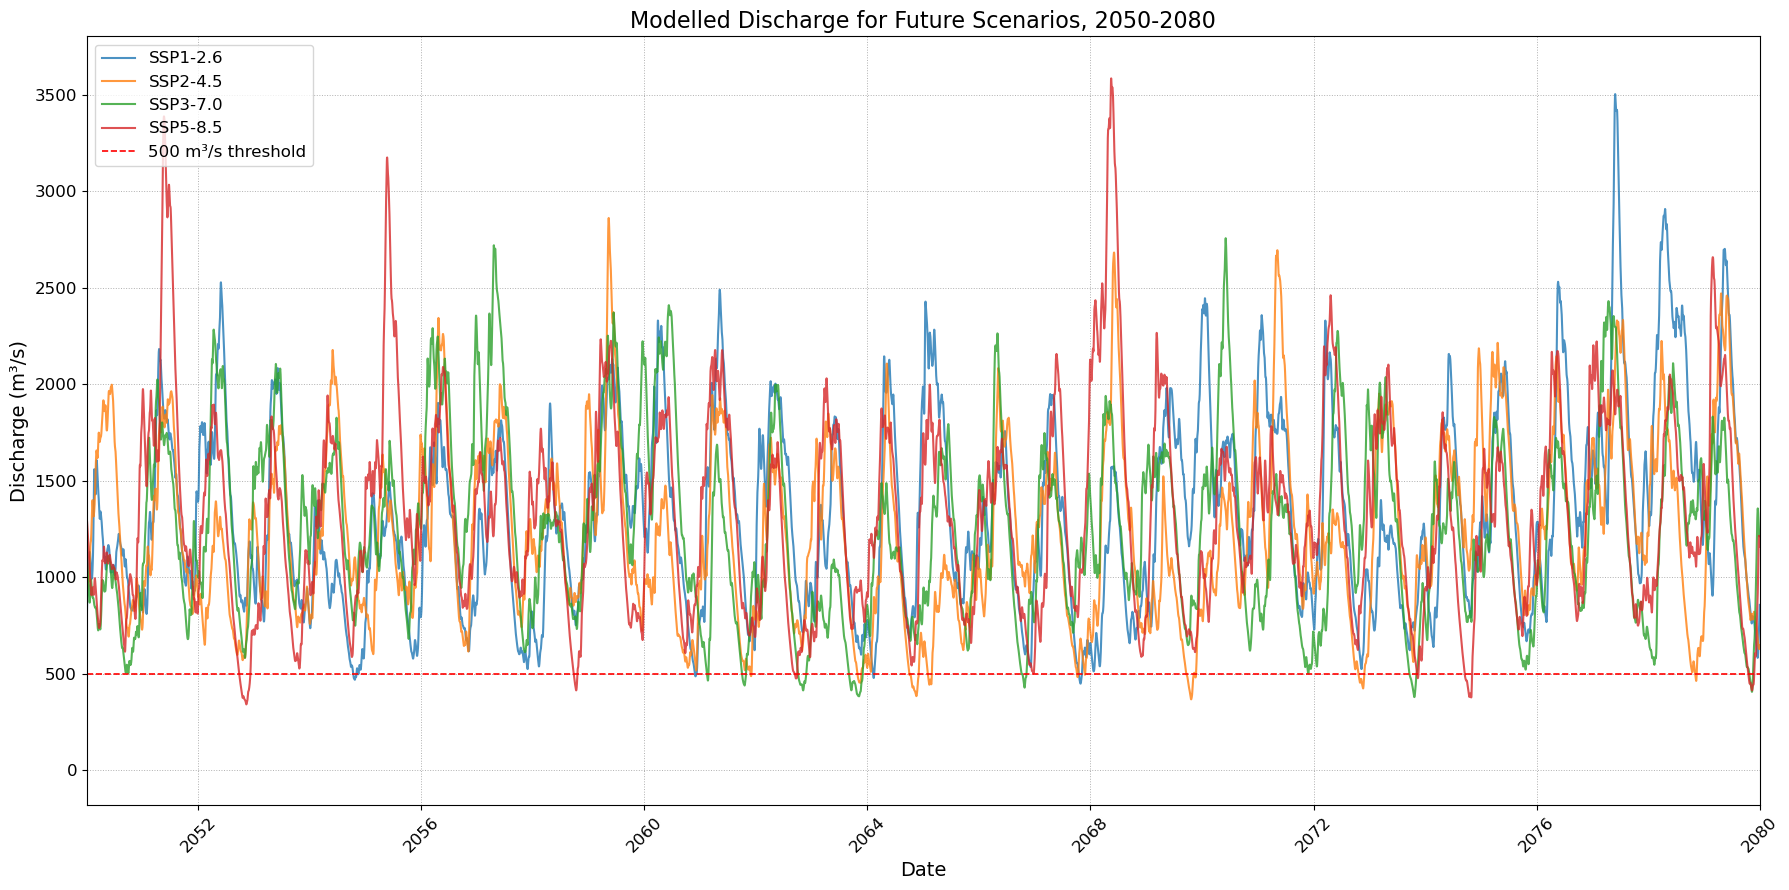

In [40]:
#Plot
plt.figure(figsize=(18, 9))  # Wider and taller

for name, data in converted_outputs.items():
    plt.plot(data.index, data.values, label=name, linewidth=1.5, alpha=0.8)

# Threshold line
plt.axhline(y=500, color='red', linestyle='--', linewidth=1.2, label='500 m³/s threshold')

# Labels and title
plt.xlabel("Date", fontsize=14)
plt.ylabel("Discharge (m³/s)", fontsize=14)
plt.title("Modelled Discharge for Future Scenarios, 2050-2080", fontsize=16)

# Ticks and legend
plt.xlim(pd.Timestamp("2050-01-01"), pd.Timestamp("2080-01-01"))
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper left", fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.7)

# Tight layout for spacing
plt.tight_layout()
plt.show()


## Save output to use in different notebooks

The model outputs are converted to a .CSV file to be used in the analysis. The values of the first year are removed, because the model first needs to 'fill', meaning these first values could be inaccurate. 

In [41]:
# Combine converted outputs only (already in m³/s)
scenario_names = ["SSP1-2.6", "SSP2-4.5", "SSP3-7.0", "SSP5-8.5"]
combined_df = pd.DataFrame(converted_outputs)
combined_df.index.name = "date"

# Remove first year (e.g. all data before Jan 1, 2027)
combined_df = combined_df[combined_df.index >= "2027-01-01"]

# Save to CSV
combined_df.to_csv("Future_scenarios_discharge.csv")